### 教材2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tfdot import tfdot

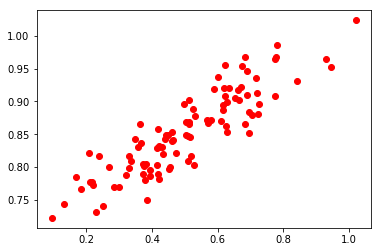

In [2]:
#先Create一些隨機的Data
#X
mu, sigma = 0.5, 0.2 #平均數及標準差
train_x = np.random.normal(mu, sigma, 100)  #產生100個平均=60, 標準差=15的成績
#Y
a = 0.3
b = 0.7
train_y = a*train_x+b+np.random.normal(0.0,0.03,100)
plt.plot(train_x,train_y,'ro', label='inputdata')
plt.show()

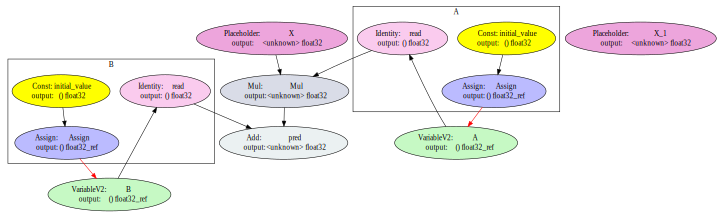

In [3]:
tf.reset_default_graph()
tf.reset_default_graph()
# Training Data
X = tf.placeholder('float', name="X")
Y = tf.placeholder('float', name="X")
#權重
A = tf.Variable(np.random.randn(), name='A')

#Bias
B = tf.Variable(np.random.randn(), name='B') 

#計算出來的Y
pred = tf.add(tf.multiply(X, A),B, name='pred')


tfdot()

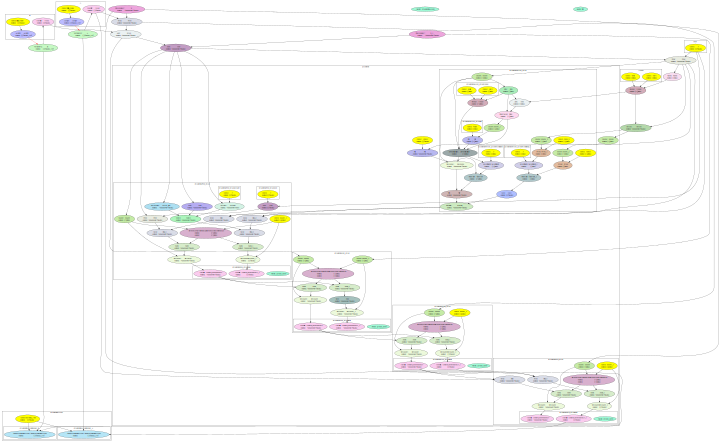

In [4]:
cost_function = tf.reduce_mean(tf.pow(pred-Y, 2))
#cost_function = tf.reduce_mean(tf.abs(y - pred))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost_function)
init = tf.global_variables_initializer()
tfdot()

In [5]:
sess = tf.InteractiveSession()
sess.run(init)

for epoh in range(200):
    for (x, y) in zip(train_x, train_y):
        sess.run(train_step, feed_dict={X: x, Y: y})
    if (epoh) % 10 == 0:
        c = sess.run(cost_function, feed_dict={X: train_x, Y:train_y})
        print ("Epoch:", epoh, "A=", sess.run(A), "B=", sess.run(B),"cost=", "{:.9f}".format(c), )

Epoch: 0 A= 0.0290123 B= 0.861186 cost= 0.003865376
Epoch: 10 A= 0.1418 B= 0.789218 cost= 0.001771423
Epoch: 20 A= 0.209819 B= 0.752039 cost= 0.001160897
Epoch: 30 A= 0.249426 B= 0.730391 cost= 0.000958822
Epoch: 40 A= 0.272489 B= 0.717785 cost= 0.000893177
Epoch: 50 A= 0.285918 B= 0.710445 cost= 0.000872591
Epoch: 60 A= 0.293738 B= 0.706171 cost= 0.000866585
Epoch: 70 A= 0.298291 B= 0.703682 cost= 0.000865115
Epoch: 80 A= 0.300943 B= 0.702233 cost= 0.000864946
Epoch: 90 A= 0.302486 B= 0.701389 cost= 0.000865082
Epoch: 100 A= 0.303385 B= 0.700898 cost= 0.000865239
Epoch: 110 A= 0.303909 B= 0.700612 cost= 0.000865358
Epoch: 120 A= 0.304214 B= 0.700445 cost= 0.000865436
Epoch: 130 A= 0.304391 B= 0.700348 cost= 0.000865485
Epoch: 140 A= 0.304495 B= 0.700292 cost= 0.000865514
Epoch: 150 A= 0.304554 B= 0.700259 cost= 0.000865532
Epoch: 160 A= 0.30459 B= 0.700239 cost= 0.000865542
Epoch: 170 A= 0.30461 B= 0.700228 cost= 0.000865548
Epoch: 180 A= 0.304621 B= 0.700222 cost= 0.000865551
Epoch: 

In [6]:
print('A:',sess.run(A))
print('B:',sess.run(B))

A: 0.304632
B: 0.700216


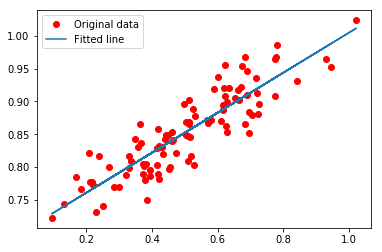

In [7]:
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.plot(train_x, sess.run(A) * train_x + sess.run(B), label='Fitted line')
plt.legend()
plt.show()